The main goal of this notebook is to test cadre assignments generated for the SCM. The steps taken to do this are:
    1. Generate synthetic dataset 
    2. Reverse engineer cadre assignments
    3. Use various models (including SGMM) to determine which model is the best case by comparing results with step 2
    4. Use data visualization tools to show difference in cadre assignments

In [1]:
from  sklearn.datasets import make_regression
import pandas as pd    
import numpy as np
from DGen import DGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import importlib
import DGen
importlib.reload(DGen)

<module 'DGen' from 'C:\\Users\\kofi_\\Documents\\GitHub\\supervised-cadres\\notebooks\\DGen.py'>

In [24]:
c_samples = 50
c_features = 5
c_informative = 5
c_cadres = 5
c_seed = 101
c_red = 0
c_classep = 4
c_flip = 0

In [25]:
df_cadre = DGen.DGenerator.generate_cadres(samples = c_samples, features = c_features, informative = c_informative, cadres = c_cadres, seed = c_seed, redundant = c_red, classep = c_classep, flip = c_flip)
df_cadre

,cad0,cad1,cad2,cad3,cad4,cadre,index_c
0,5.037721,5.199535,1.128681,-1.539992,-4.326137,0,0
1,4.350090,-4.161882,4.980395,4.277520,-4.315992,0,1
2,6.087425,-5.219634,3.678772,1.895432,-6.649773,0,2
3,4.325172,4.205251,2.203640,-3.321574,-4.757564,0,3
4,1.466286,0.533449,5.908886,-1.138974,-4.263570,0,4
5,4.042202,-3.668097,4.333931,3.631174,-4.200322,0,5
6,3.615054,4.293281,2.849020,-2.676005,-3.838405,0,6
7,4.896424,-2.890353,2.358570,3.839356,-2.870767,0,7
8,4.664166,-5.047708,2.612994,2.111401,-5.518610,0,8
9,3.219060,-2.410388,4.018409,4.240964,-3.024690,0,9


In [26]:
cadre0 = df_cadre[df_cadre.cadre == 0] 
cadre1 = df_cadre[df_cadre.cadre == 1] 
cadre2 = df_cadre[df_cadre.cadre == 2] 
cadre3 = df_cadre[df_cadre.cadre == 3]
cadre4 = df_cadre[df_cadre.cadre == 4] 

In [27]:
cadre0

,cad0,cad1,cad2,cad3,cad4,cadre,index_c
0,5.037721,5.199535,1.128681,-1.539992,-4.326137,0,0
1,4.350090,-4.161882,4.980395,4.277520,-4.315992,0,1
2,6.087425,-5.219634,3.678772,1.895432,-6.649773,0,2
3,4.325172,4.205251,2.203640,-3.321574,-4.757564,0,3
4,1.466286,0.533449,5.908886,-1.138974,-4.263570,0,4
5,4.042202,-3.668097,4.333931,3.631174,-4.200322,0,5
6,3.615054,4.293281,2.849020,-2.676005,-3.838405,0,6
7,4.896424,-2.890353,2.358570,3.839356,-2.870767,0,7
8,4.664166,-5.047708,2.612994,2.111401,-5.518610,0,8
9,3.219060,-2.410388,4.018409,4.240964,-3.024690,0,9


In [39]:
print(cadre1['cadre'].count())
cadre1

11


,cad0,cad1,cad2,cad3,cad4,cadre,index_c
11,-3.686830,-3.728672,-3.008399,3.645985,-8.140522,1,1
12,-4.125255,-3.754549,-5.379747,2.214811,-5.294783,1,2
13,3.619417,6.093789,5.074453,-4.198112,4.660604,1,3
14,3.178361,1.723044,4.085757,-3.465085,5.864671,1,4
15,5.423417,2.907951,2.560092,-2.740148,6.017755,1,5
16,-6.104407,-3.451238,-3.679227,5.967701,0.037396,1,6
17,5.423057,1.245000,3.788119,-4.309306,1.836312,1,7
18,3.731442,8.135165,6.853824,-6.159214,2.502394,1,8
19,-7.334225,-3.136420,-4.968884,4.993253,-1.357352,1,9
20,3.383237,6.100891,5.069205,-5.137863,3.394753,1,0


In [38]:
print(cadre2['cadre'].count())
cadre2

10


,cad0,cad1,cad2,cad3,cad4,cadre,index_c
22,4.290094,4.382642,-4.612260,-4.488618,3.768071,2,2
23,5.622584,4.562745,-4.008656,-4.571795,3.465016,2,3
24,-3.857097,3.027411,-3.528635,4.292425,3.223841,2,4
25,4.084551,1.375240,-3.816876,-1.945982,5.323790,2,5
26,2.620727,3.420057,-0.768091,-2.928503,4.897812,2,6
27,6.728776,4.851805,-7.050725,-4.975166,2.623524,2,7
28,-3.785942,3.541993,-4.314693,3.998820,3.248984,2,8
29,-3.062469,3.858954,-5.346051,4.068069,3.075085,2,9
30,-5.792888,4.927739,-5.868184,5.360139,4.351730,2,0
31,-3.849373,6.458219,-3.113704,5.338454,4.050107,2,1


In [37]:
print(cadre3['cadre'].count())
cadre3

10


,cad0,cad1,cad2,cad3,cad4,cadre,index_c
32,-3.472564,3.567101,4.664780,-3.800142,5.224003,3,2
33,-3.246760,4.121717,4.214711,-3.665447,5.084658,3,3
34,-2.850768,2.079993,3.205020,-1.648575,5.097838,3,4
35,-5.950984,3.556806,-6.537197,-3.158740,4.967499,3,5
36,-6.765494,5.319297,-3.396235,-3.528677,3.917392,3,6
37,-3.225898,5.053397,-2.030871,-6.483362,3.253901,3,7
38,-3.160800,4.400320,3.534222,-3.937024,4.283098,3,8
39,-3.745544,3.162638,-4.426348,-3.531179,1.734860,3,9
40,-3.955284,5.240683,-1.902714,-5.438203,3.519689,3,0
41,-2.964292,3.697931,2.640463,-2.086339,5.299217,3,1


In [36]:
print(cadre4['cadre'].count())
cadre4

8


,cad0,cad1,cad2,cad3,cad4,cadre,index_c
42,-2.882351,6.806465,-0.903293,-5.826886,-3.247414,4,2
43,-3.971065,3.340454,-4.245812,-2.546346,-3.775272,4,3
44,-6.138337,0.808498,6.420102,4.234594,-5.014469,4,4
45,-3.741971,4.369778,5.030505,4.498874,-2.865223,4,5
46,-4.259291,3.833504,-5.387350,-4.931801,-4.056730,4,6
47,-5.312573,1.952915,4.454647,5.592910,-5.709991,4,7
48,-3.663536,4.303863,3.618053,4.031440,-4.076872,4,8
49,-4.164159,4.508948,-4.871097,-5.320258,-3.129015,4,9


In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5)
kmeans.fit(df_cadre)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [59]:
df_cadre["kmeans"] = kmeans.labels_

In [60]:
df_cadre

,cad0,cad1,cad2,cad3,cad4,cadre,kmeans
0,5.037721,5.199535,1.128681,-1.539992,-4.326137,0,0
1,4.350090,-4.161882,4.980395,4.277520,-4.315992,0,4
2,6.087425,-5.219634,3.678772,1.895432,-6.649773,0,4
3,4.325172,4.205251,2.203640,-3.321574,-4.757564,0,0
4,1.466286,0.533449,5.908886,-1.138974,-4.263570,0,0
5,4.042202,-3.668097,4.333931,3.631174,-4.200322,0,4
6,3.615054,4.293281,2.849020,-2.676005,-3.838405,0,0
7,4.896424,-2.890353,2.358570,3.839356,-2.870767,0,4
8,4.664166,-5.047708,2.612994,2.111401,-5.518610,0,4
9,3.219060,-2.410388,4.018409,4.240964,-3.024690,0,4


In [61]:
sum_sq = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters = k).fit(df_cadre)
    sum_sq[k] = kmeans.inertia_

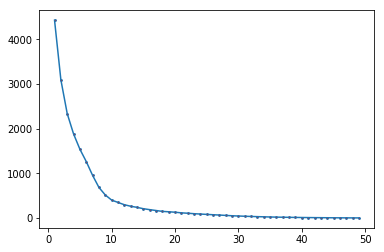

In [62]:
# plot elbow graph
plt.plot(list(sum_sq.keys()),
         list(sum_sq.values()),
        linestyle = '-',
        marker = 'H',
        markersize = 2,
        markerfacecolor = 'red')

In [64]:
from supervisedGmm import SupervisedGMM

ModuleNotFoundError: No module named 'supervisedGmm'

In [ ]:
np.random.seed( seed = 0)
n_clusters = 5
alpha = [0.005,0.01,0.05,0.1,0.5,1,5,10]
model = SupervisedGMM( cv=10, alpha = alpha, n_clusters = n_clusters,max_iter = 100,max_iter2 = 10, adaR=1)
Xtrain, Xtest, ytrain, ytest = model.split( data = sparcs1.values)